In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\kevin\Downloads\bank_note_data.csv")

In [3]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
features = list(data.columns)[:-1]
target = list(data.columns)[-1:]

In [5]:
features
target

['Class']

## Scaling data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
data_norm = data.copy()
data_norm[features] = sc.fit_transform(data[features])

In [8]:
data_norm[features]

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


## TSNE

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(learning_rate=500,n_components=2)

In [11]:
x_tsne = tsne.fit_transform(data_norm[features])

In [12]:
x_tsne

array([[-28.819801, -25.779907],
       [-26.82279 , -29.37888 ],
       [ 37.071777, -29.899214],
       ...,
       [ 60.413616,  16.214188],
       [ 52.00146 ,  14.781543],
       [ 18.672264,  34.96175 ]], dtype=float32)

In [13]:
y = data[target]

In [14]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


Text(0, 0.5, 'Dimension 2')

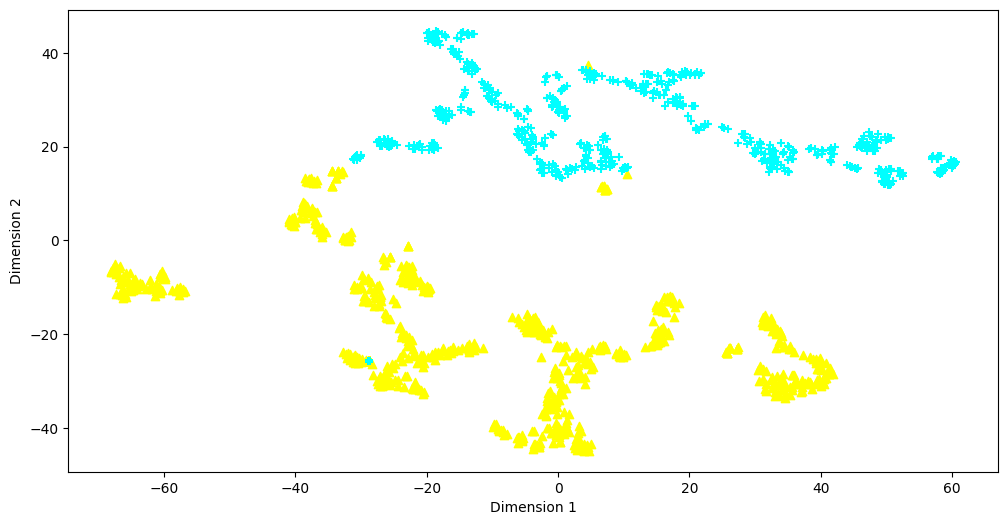

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(x_tsne[np.where(y==0),0],x_tsne[np.where(y==0),1],c='yellow',marker="^")
plt.scatter(x_tsne[np.where(y==1),0],x_tsne[np.where(y==1),1],c='cyan',marker="+")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")